<a href="https://colab.research.google.com/github/endzix22/machine-learning-bootcamp/blob/main/image_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Klasyfikator wieloklasowy - Image Classification

Celem tego notebook'a jest budowa modelu klasyfikacji obrazów przedstawiających różne elementy ubioru. W tym celu wykorzystamy kolejny popularny zbiór danych w dziedzinie sieci neuronowych: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

Fashion-MNIST to zestaw danych z obrazkami artykułów Zalando - składający się z zestawu treningowego 60 000 przykładów i zestawu testowego 10 000 przykładów. Każdy przykład to obraz w skali szarości 28 x 28, powiązany z jedną etykietą z 10 klas.

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

#### Przykładowe obrazy
<img src='https://storage.cloud.google.com/esmartdata-courses-files/ann-course/zalando10x10.jpeg' width=600>



In [3]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets.fashion_mnist import load_data

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
sns.set(font_scale=1.3)

Załadowanie danych i wstępna eksploracja

In [4]:
(X_train, y_train), (X_test, y_test) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [9]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')
#rozmiar jednej probki ze zbioru treningowego 28x28 
print(f'X_train[0] shape: {X_train[0].shape}')


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
X_train[0] shape: (28, 28)


In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 236, 207, 178, 107, 156

In [11]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

(-0.5, 27.5, 27.5, -0.5)

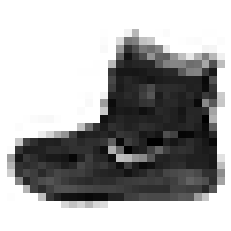

In [12]:
plt.imshow(X_train[0],cmap='gray_r')
plt.axis('off')
#

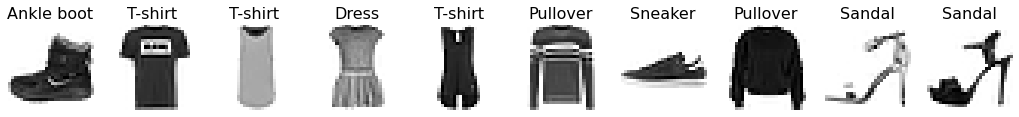

In [13]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(18, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(class_names[y_train[i-1]], color='black', fontsize=16)
plt.show()

Przygotowanie danych

In [15]:
#standaryzacja naszych danych
X_train=X_train/255.
Z_test=X_test/255.

In [16]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)


In [17]:
#Wyplaszczenie danych 
X_train = X_train.reshape(60000, 28 * 28)
#60000 danych 28x28
X_test = X_test.reshape(10000, 28 * 28)
#10000 danych 28x28 
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [18]:
X_train[0].shape

(784,)

Budowa modelu

In [20]:
#uzyjemy metody wektorow nosnych do klasyfikacji obrazu 
#lepsza metoda sa tylko konwolucyjne sieci neuronowe 
from sklearn.svm import SVC 

classifier=SVC()
classifier.fit(X_train,y_train)

SVC()

Oczywiscie najlepsze parametry mozna sprawdzic

In [21]:
y_pred=classifier.predict(X_test)
y_pred
#przewidziane klasy dla probek testowych 

array([5, 5, 5, ..., 5, 5, 5], dtype=uint8)

Ocena modelu

In [22]:
from sklearn.metrics import accuracy_score
#sprawdzmy dokladnosc na zbiorze testowym i predykcji 

accuracy_score(y_test, y_pred)

0.1

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1000,    0,    0,    0,    0]])

In [24]:

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    import plotly.figure_factory as ff
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=class_names, index=class_names[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=800, height=600, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

Sprawdzmy z ktorymi klasami model mial problem 

Dazymy do maksymalizacji wartosci na przekatnej, a to wszystko poza przekatna swiadczy o bledzie 

np. Shirt czesto mylony z T-Shirt albo z Pullover i Coat 

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=class_names))


#klasa Trouser najelpiej przewidywalna 

              precision    recall  f1-score   support

     T-shirt       0.00      0.00      0.00      1000
     Trouser       0.00      0.00      0.00      1000
    Pullover       0.00      0.00      0.00      1000
       Dress       0.00      0.00      0.00      1000
        Coat       0.00      0.00      0.00      1000
      Sandal       0.10      1.00      0.18      1000
       Shirt       0.00      0.00      0.00      1000
     Sneaker       0.00      0.00      0.00      1000
         Bag       0.00      0.00      0.00      1000
  Ankle boot       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Błędnie sklasyfikowane obrazy 

In [26]:
results = pd.DataFrame(data={'y_pred': y_pred, 'y_test': y_test})
results.head(10)

,y_pred,y_test
0,5,9
1,5,2
2,5,1
3,5,1
4,5,6
5,5,1
6,5,4
7,5,6
8,5,5
9,5,7


In [27]:
errors = results[results['y_pred'] != results['y_test']]
errors_idxs = list(errors.index)
errors_idxs[:10]
#indeksy gdzie nasze zmienne sie roznia 


[0, 1, 2, 3, 4, 5, 6, 7, 9, 10]

In [28]:
results.loc[errors_idxs[:10], :]
#wyswietlenie 10 pierwszych bledow 

,y_pred,y_test
0,5,9
1,5,2
2,5,1
3,5,1
4,5,6
5,5,1
6,5,4
7,5,6
9,5,7
10,5,4


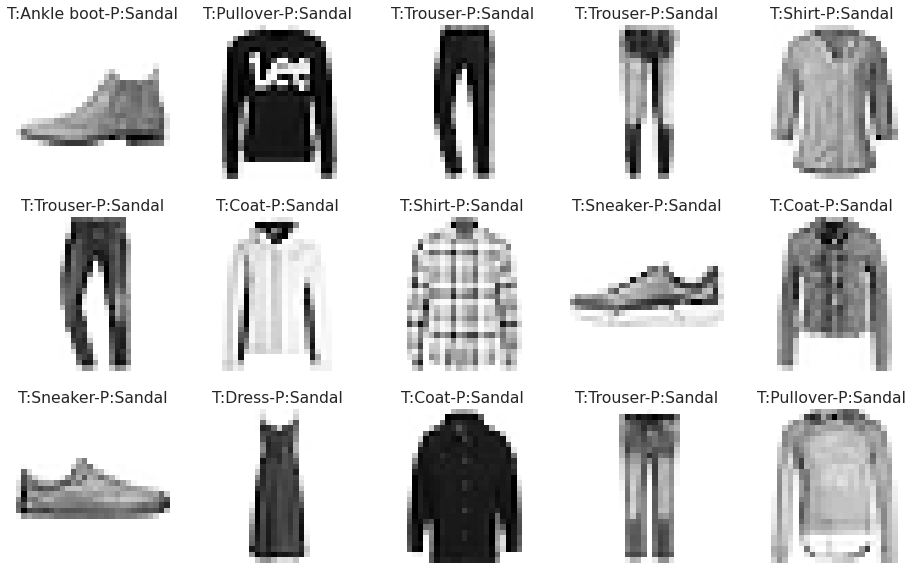

In [29]:
#wyswietlneie bledow 
plt.figure(figsize=(16, 10))
for idx, error_idx in enumerate(errors_idxs[:15]):
    image = X_test[error_idx].reshape(28, 28)
    plt.subplot(3, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"T:{class_names[results.loc[error_idx, 'y_test']]}-P:{class_names[results.loc[error_idx, 'y_pred']]}")

In [31]:
len(errors_idxs) / 10000


0.9